# 15 - KNN Classifier

**K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.**

**K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.**


**K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.**

**K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.**

# Get and Prepare Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Get dataset 
df = pd.read_csv("diabetes.csv")
data = df.copy()

# Clear null values
data = data.dropna()

# Declare dependent and independent variables
X = data.drop(["Outcome"],axis=1)
y = data["Outcome"]

# Split train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)


In [2]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Outcome'>

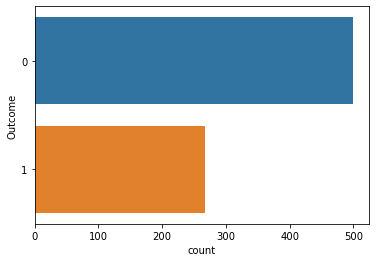

In [3]:
sns.countplot(y="Outcome",data=data)

# Import the Model

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [6]:
from sklearn.metrics import accuracy_score,classification_report

y_pred = knn_model.predict(X_test)
print(f"Test Accuracy Score : {accuracy_score(y_test,y_pred)}")

Test Accuracy Score : 0.7077922077922078


In [8]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        99
           1       0.62      0.47      0.54        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154



# Model Tuning

**Hyperparameter --> Number of neighbors**

In [9]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
knn_params = {"n_neighbors":np.arange(1,20)}

knn_cv_model = GridSearchCV(knn,knn_params,cv=10)
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [15]:
print(f"Optimum number of neighbors : {knn_cv_model.best_params_['n_neighbors']}")
print("Cross-validated Accuracy Score : %.2f" % (knn_cv_model.best_score_))

Optimum number of neighbors : 16
Cross-validated Accuracy Score : 0.76


# Tuned Model

In [16]:
knn_tuned_model = KNeighborsClassifier(n_neighbors=16).fit(X_train,y_train)

In [20]:
y_pred_tuned = knn_tuned_model.predict(X_test)
print("Tuned Test Accuracy Score : %.3f" % (accuracy_score(y_test,y_pred_tuned)))

Tuned Test Accuracy Score : 0.727


In [21]:
knn_tuned_model.score(X_test,y_test)

0.7272727272727273